<a href="https://colab.research.google.com/github/Mateo101125/methixanthin_content_in_ilex_guayusa_-python/blob/main/Anova_y_tukey_guayusa_theobromina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#connect Drive with colab


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy import stats as sts
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
!pip install pingouin
import pingouin as pg
import pylab as py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.5 MB/s eta 0:00:00


In [6]:
path = "/content/drive/MyDrive/script_Guayusa/data_q.xlsx"
data_hplc = pd.read_excel(path)
data_hplc

,Chakra,light_condition,age_period,Caffeine,Theobromine,Theophylline
0,A,+,T0,24.866384,0.157598,NaN
1,A,+,T0,26.079888,0.167050,NaN
2,A,+,T0,26.606184,0.175299,NaN
3,A,-,T0,29.011980,0.030485,NaN
4,A,-,T0,28.736393,0.029729,NaN
5,A,-,T0,28.242765,0.026408,NaN
6,A,+,T1,22.564354,0.191126,NaN
7,A,+,T1,22.729765,0.176848,NaN
8,A,+,T1,23.869761,0.193597,NaN
9,A,-,T1,25.440661,0.061057,0.077486


In [7]:
formula = 'Theobromine ~ Chakra * age_period * light_condition '

model = sm.formula.ols(formula, data= data_hplc).fit()
aov_table =  sm.stats.anova_lm(model,typ= 1)

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Theobromine   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     22.06
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           4.20e-14
Time:                        22:09:27   Log-Likelihood:                 77.768
No. Observations:                  54   AIC:                            -119.5
Df Residuals:                      36   BIC:                            -83.73
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

#Normality Tests

##Shapiro–Wilk test

In [9]:
w, p= sts.shapiro(model.resid)
print('w=%.9f, p_value=%.9f' % (w, p))

w=0.766450620, p_value=0.000000070


#Levene test for homogeneity of variance

In [10]:
data_hplc['interaction'] = data_hplc['age_period']+data_hplc['light_condition']+data_hplc['Chakra']

pg.homoscedasticity(data=data_hplc,
                    dv='Theobromine',
                    group='interaction').round(5)

,W,pval,equal_var
levene,1.11315,0.37958,True


#Assumption of independence:

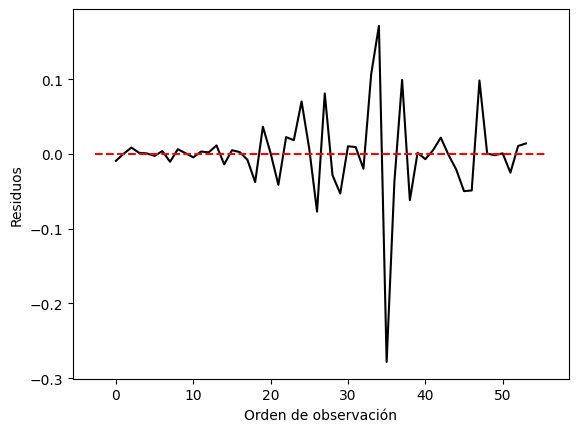

In [11]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color='red')
residual= model.resid
#abline(h=0,col="red")
plt.plot(residual, color='black')
plt.xlabel('Orden de observación')
plt.ylabel('Residuos')
abline(0, 0)
plt.show()

# Durbin-Watson Test

In [12]:
from statsmodels.stats.stattools import durbin_watson as dwtest

import numpy as np

dwtest(resids=np.array(model.resid))

2.4576487059194694

In [13]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Chakra,2.0,1.192743,0.596371,121.001590,1.048454e-16
age_period,2.0,0.122076,0.061038,12.384350,8.076179e-05
light_condition,1.0,0.000273,0.000273,0.055424,8.152139e-01
Chakra:age_period,4.0,0.049773,0.012443,2.524694,5.768284e-02
Chakra:light_condition,2.0,0.323471,0.161736,32.815567,7.708381e-09
age_period:light_condition,2.0,0.073668,0.036834,7.473525,1.928867e-03
Chakra:age_period:light_condition,4.0,0.086654,0.021664,4.395470,5.374906e-03
Residual,36.0,0.177430,0.004929,NaN,NaN


#TUKEY


In [14]:
# perform Tukey's test
#Comparacion Chakra
tukey_Ch = pairwise_tukeyhsd(endog=data_hplc['Theobromine'],
                          groups=data_hplc['Chakra'],
                          alpha=0.05)
#Comparacion age_period
tukey_Ac = pairwise_tukeyhsd(endog=data_hplc['Theobromine'],
                          groups=data_hplc['age_period'],
                          alpha=0.05)
#Comparacion light_condition
tukey_Lc = pairwise_tukeyhsd(endog=data_hplc['Theobromine'],
                          groups=data_hplc['light_condition'],
                          alpha=0.05)
#Comparacion Chakra:light_condition
data_hplc['interaction_Ch_Lc'] = data_hplc['Chakra']+data_hplc['light_condition']
tukey_Ch_Lc = pairwise_tukeyhsd(endog=data_hplc['Theobromine'],
                          groups=data_hplc['interaction_Ch_Lc'],
                          alpha=0.05)
#Comparacion Chakra:age_period
data_hplc['interaction_Ch_Ac'] = data_hplc['Chakra']+data_hplc['age_period']
tukey_Ch_Ac = pairwise_tukeyhsd(endog=data_hplc['Theobromine'],
                          groups=data_hplc['interaction_Ch_Ac'],
                          alpha=0.05)
#Comparacion light_condition:age_period
data_hplc['interaction_Lc_Ac'] = data_hplc['light_condition']+data_hplc['age_period']
tukey_Lc_Ac = pairwise_tukeyhsd(endog=data_hplc['Theobromine'],
                          groups=data_hplc['interaction_Lc_Ac'],
                          alpha=0.05)
#Comparacion Chakra:light_condition:age_period
data_hplc['interaction_all'] = data_hplc['Chakra']+data_hplc['light_condition']+data_hplc['age_period']
tukey_all = pairwise_tukeyhsd(endog=data_hplc['Theobromine'],
                          groups=data_hplc['interaction_all'],
                          alpha=0.05)

#display results
#Comparacion Chakra
print(tukey_Ch)
#Comparacion age_period
print(tukey_Ac)
#Comparacion light_condition
print(tukey_Lc)
#Comparacion Chakra:light_condition
print(tukey_Ch_Lc)
#Comparacion Chakra:age_period
print(tukey_Ch_Ac)
#Comparacion light_condition:age_period
print(tukey_Lc_Ac)
#Comparacion Chakra:light_condition:age_period
print(tukey_all)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   0.3618    0.0   0.259  0.4647   True
     A      C   0.1461 0.0034  0.0432  0.2489   True
     B      C  -0.2157    0.0 -0.3186 -0.1129   True
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    T0     T1  -0.0344 0.8551 -0.1899 0.1211  False
    T0     T2   0.0792 0.4416 -0.0763 0.2346  False
    T1     T2   0.1136 0.1923 -0.0419  0.269  False
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     +      -  -0.0045 0.9336 -0.1123 0.1033  False
---------------------------------------------------
Multi

In [ ]:
pip freeze

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.2.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.2
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.5
cufflinks==0.17.3
cupy-cuda12x==12.2.0